# Creating variables for modeling used for boosting (from df produced)

In [2]:
import xarray as xr
import numpy as np
import scipy.interpolate as interp
import pandas as pd

import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt

from math import radians, cos, sin, asin, sqrt

### Importing the dataframe

In [3]:
df = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced/df_bed_surf_elev.csv')
slope_df = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced/df_bed_surfe_thick_slope.csv')

/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Convert surge class to end up only with 2 different classes (surge/non-surge)

In [4]:
def convert_surge(surge_value):
    """
    Surging
    The Surging attribute contains information on evidence for surging, and
    is based on the inventory of Sevestre and Benn (2015).

    Value Surging
    0 No evidence
    1 Possible
    2 Probable
    3 Observed
    9 Not assigned
    
    We convert 1,2,3 to surgetype and 0,9 to not surgetype
    """
    surgetype = {0:0, 1:0, 2:1, 3:1, 9:0}
    return surgetype[surge_value]

df['surgetype'] = df.Surge.apply(convert_surge)

In [5]:
glacstats_df = df[['rgiid', 'Name', 'surgetype', 'BgnDate', 'EndDate', 'CenLon', 'CenLat',
       'Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect', 'Lmax']].drop_duplicates()

In [6]:
analysis_df = slope_df.merge(glacstats_df)
# analysis_df.thick_mean.fillna(-999, inplace=True)
# analysis_df.slope.fillna(-999, inplace=True)
analysis_df.dropna(subset=['thick_mean', 'bed_slope'], inplace=True)

Text(0.5, 0, 'bed slope')

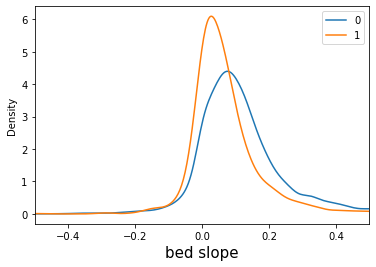

In [7]:
fig, ax = plt.subplots()

analysis_df.groupby('surgetype').bed_slope.plot.kde(ax=ax)
ax.set_xlim(-0.5, 0.5)
ax.legend()
ax.set_xlabel('bed slope', fontsize=15)

surgetype
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: bed_slope, dtype: object

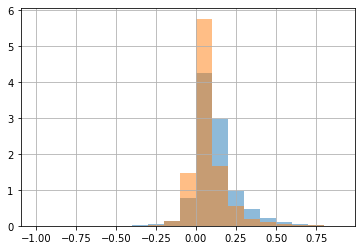

In [8]:
analysis_df.groupby('surgetype').bed_slope.hist(density=True, alpha=0.5, bins=np.arange(-1, 1, 0.1))

Text(0.5, 0, 'surface slope')

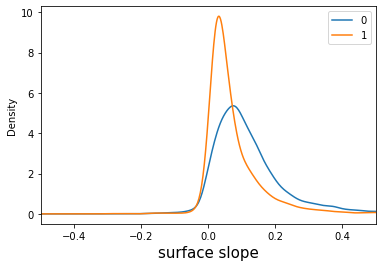

In [9]:
fig, ax = plt.subplots()

analysis_df.groupby('surgetype').surf_slope.plot.kde(ax=ax)
ax.set_xlim(-0.5, 0.5)
ax.legend()
ax.set_xlabel('surface slope', fontsize=15)

Text(0.5, 0, 'mean window thickness')

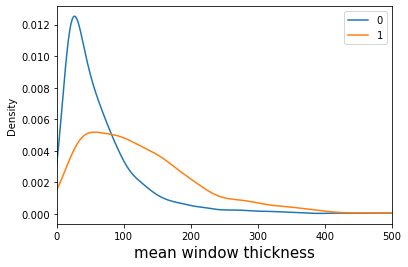

In [10]:
fig, ax = plt.subplots()

analysis_df.groupby('surgetype').thick_mean.plot.kde(ax=ax)
ax.set_xlim(0, 500)
ax.legend()
ax.set_xlabel('mean window thickness', fontsize=15)

/usr/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDe

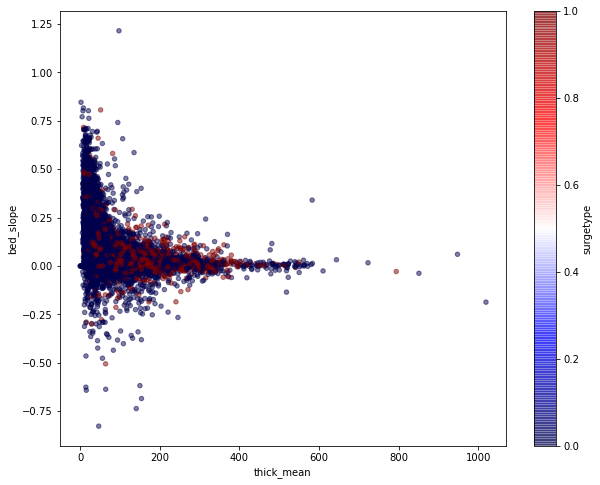

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))

analysis_df.plot.scatter(x='thick_mean', y='bed_slope', c='surgetype', cmap='seismic', ax=ax, alpha=0.5)

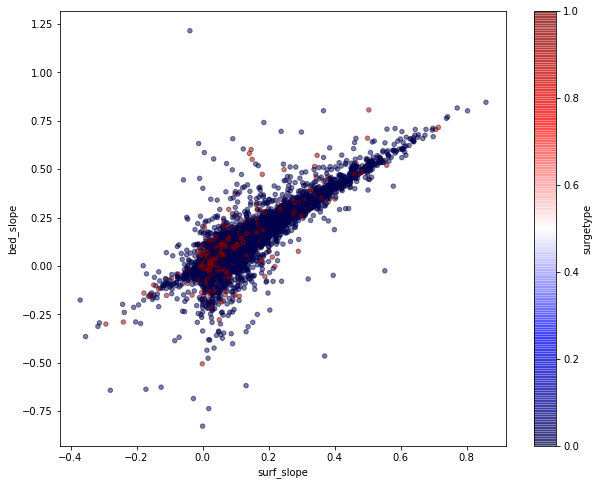

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))

analysis_df.plot.scatter(x='surf_slope', y='bed_slope', c='surgetype', cmap='seismic', ax=ax, alpha=0.5)

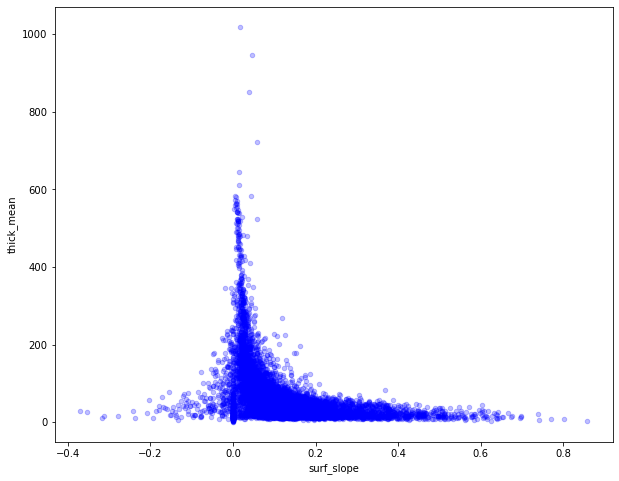

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))

analysis_df[analysis_df.surgetype==0].plot.scatter(x='surf_slope', y='thick_mean', color='blue', ax=ax, alpha=0.25)

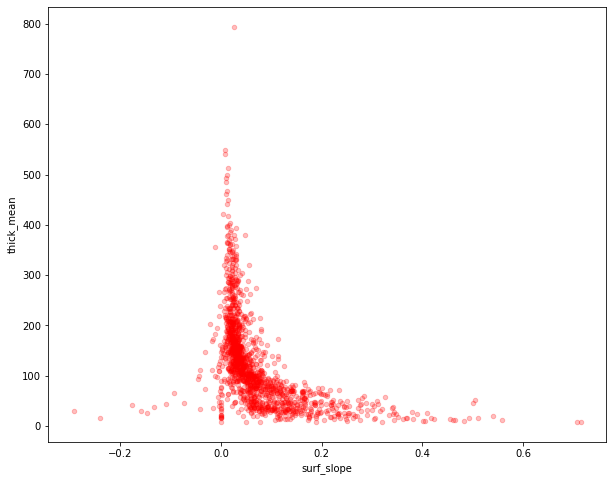

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))

analysis_df[analysis_df.surgetype==1].plot.scatter(x='surf_slope', y='thick_mean', color='red', ax=ax, alpha=0.25)

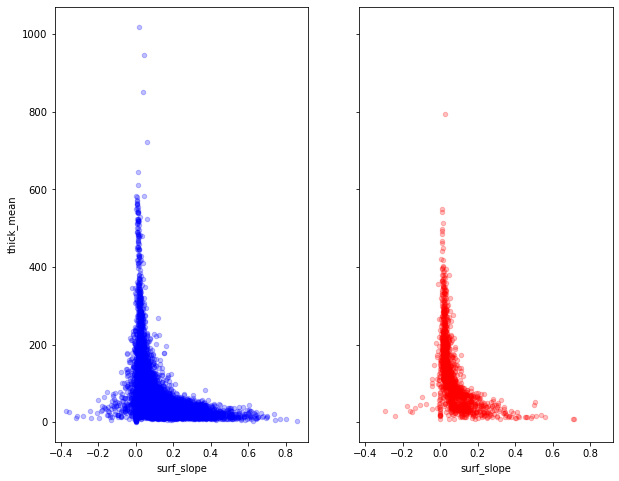

In [15]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 8), sharey=True, sharex=True)

analysis_df[analysis_df.surgetype==0].plot.scatter(x='surf_slope', y='thick_mean', color='blue', ax=ax, alpha=0.25)

analysis_df[analysis_df.surgetype==1].plot.scatter(x='surf_slope', y='thick_mean', color='red', ax=ax2, alpha=0.25)

<ipython-input-16-1a33337bde04>:9: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xe[:-1], ye[:-1], h, cmap='Blues', label='surgetype')
<ipython-input-16-1a33337bde04>:13: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xe[:-1], ye[:-1], h, cmap='Reds', label='NOT surgetype')


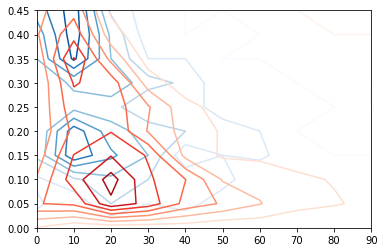

In [16]:
datasurge = analysis_df[analysis_df.surgetype==1]
datanosurge = analysis_df[analysis_df.surgetype==0]
# h, xe, ye = np.histogram2d(analysis_df.thick_mean, analysis_df.slope, bins=10, range=[[0, 100], [0, 0.5]])

fig, ax = plt.subplots()

h, xe, ye = np.histogram2d(datasurge.thick_mean, datasurge.bed_slope, bins=10, range=[[0, 100], [0, 0.5]])

ax.contour(xe[:-1], ye[:-1], h, cmap='Blues', label='surgetype')

h, xe, ye = np.histogram2d(datanosurge.thick_mean, datanosurge.bed_slope, bins=10, range=[[0, 100], [0, 0.5]])

ax.contour(xe[:-1], ye[:-1], h, cmap='Reds', label='NOT surgetype')
# ax.set_xlim(0, 10)

In [25]:
analysis_df.shape

(10493, 20)

In [41]:
# analysis_df.dropna(subset=['thick_mean', 'slope']).shape

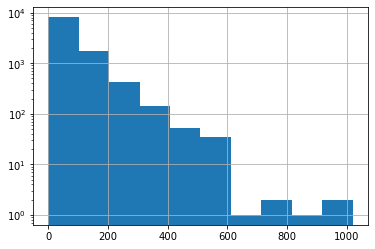

In [26]:
analysis_df.thick_mean.hist(log=True)

In [43]:
# analysis_df[['rgiid', 'surgetype']].drop_duplicates().count()

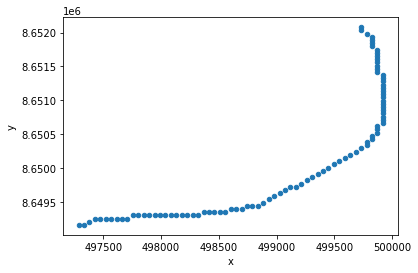

In [27]:
df[df.rgiid=='RGI60-07.01566'].plot.scatter(x='x', y='y')

# Create dataframe for each window per glacier with thick, window_length, bedslope, surf slope

In [17]:
th = analysis_df.pivot_table(index='rgiid', columns='window_id', values='thick_mean')
th.columns = ['thick_w'+str(t) for t in th.columns]

wl = analysis_df.pivot_table(index='rgiid', columns='window_id', values='window_length')
wl.columns = ['windowlength_w'+str(t) for t in wl.columns]

bs = analysis_df.pivot_table(index='rgiid', columns='window_id', values='bed_slope')
bs.columns = ['bedslope_w'+str(t) for t in bs.columns]

ss = analysis_df.pivot_table(index='rgiid', columns='window_id', values='surf_slope')
ss.columns = ['surfslope_w'+str(t) for t in ss.columns]

In [18]:
th

,thick_w0,thick_w1,thick_w2,thick_w3,thick_w4,thick_w5,thick_w6,thick_w7,thick_w8,thick_w9,thick_w10,thick_w11
rgiid,,,,,,,,,,,,
RGI60-07.00004,28.124966,33.024520,35.359420,35.605247,35.146767,32.337025,31.146065,28.473240,25.096203,20.191658,NaN,NaN
RGI60-07.00006,24.034931,41.583218,89.191570,84.318634,51.348080,45.334070,45.027786,53.622566,52.643333,46.472580,50.801445,NaN
RGI60-07.00008,26.881970,29.738972,27.283990,22.632895,19.860367,17.604805,17.312263,15.445148,14.482729,14.570744,12.777881,NaN
RGI60-07.00010,19.960442,22.366863,23.418694,21.783665,20.337430,21.572006,16.371708,15.356702,16.249270,17.168152,18.186327,NaN
RGI60-07.00024,13.757988,14.597683,12.439909,10.342457,10.829138,16.081718,18.763485,10.793846,11.094700,11.459888,11.694003,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
RGI60-07.01562,22.943802,31.091790,72.507140,78.564020,78.941040,70.506680,63.374170,55.343290,48.617020,46.996292,48.751537,NaN
RGI60-07.01563,34.055214,68.450836,70.469680,73.455520,85.295620,81.816414,70.958595,73.349625,69.521225,60.710930,NaN,NaN
RGI60-07.01564,63.128494,109.797960,104.403480,56.740112,75.952230,123.439030,176.904830,157.166800,154.651630,128.332730,90.946610,NaN


In [30]:
analysis_df.columns

Index(['Unnamed: 0', 'window_length', 'bed_slope', 'thick_mean', 'surf_slope',
       'window_id', 'rgiid', 'Name', 'surgetype', 'BgnDate', 'EndDate',
       'CenLon', 'CenLat', 'Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect',
       'Lmax'],
      dtype='object')

In [19]:
an_df = analysis_df[['rgiid', 'Name', 'surgetype', 'BgnDate', 'EndDate', 'CenLon', 'CenLat', 'Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect', 'Lmax']].drop_duplicates().set_index('rgiid')

### Join all the dataframe per window together

In [20]:
statmodel_df = an_df.join(th).join(wl).join(bs).join(ss).copy()

In [21]:
statmodel_df.columns

Index(['Name', 'surgetype', 'BgnDate', 'EndDate', 'CenLon', 'CenLat', 'Area',
       'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect', 'Lmax', 'thick_w0',
       'thick_w1', 'thick_w2', 'thick_w3', 'thick_w4', 'thick_w5', 'thick_w6',
       'thick_w7', 'thick_w8', 'thick_w9', 'thick_w10', 'thick_w11',
       'windowlength_w0', 'windowlength_w1', 'windowlength_w2',
       'windowlength_w3', 'windowlength_w4', 'windowlength_w5',
       'windowlength_w6', 'windowlength_w7', 'windowlength_w8',
       'windowlength_w9', 'windowlength_w10', 'windowlength_w11',
       'bedslope_w0', 'bedslope_w1', 'bedslope_w2', 'bedslope_w3',
       'bedslope_w4', 'bedslope_w5', 'bedslope_w6', 'bedslope_w7',
       'bedslope_w8', 'bedslope_w9', 'bedslope_w10', 'bedslope_w11',
       'surfslope_w0', 'surfslope_w1', 'surfslope_w2', 'surfslope_w3',
       'surfslope_w4', 'surfslope_w5', 'surfslope_w6', 'surfslope_w7',
       'surfslope_w8', 'surfslope_w9', 'surfslope_w10', 'surfslope_w11'],
      dtype='object')

In [22]:
statmodel_df.to_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced/df_statmodel_reduced.csv')